# Get Interactive plots directly with pandas.

Link do site deste exemplo: [https://towardsdatascience.com/get-interactive-plots-directly-with-pandas-13a311ebf426](https://towardsdatascience.com/get-interactive-plots-directly-with-pandas-13a311ebf426)

## Objetivo

Tutorial sobre como criar plotagens utiliznado o Plotly e Bokeh

## Importação das bibliotecas

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Leitura do arquivo

In [6]:
# Dados diários desde 01/01/2000 até 27/07/2000.
# Trabalharemos com o conjunto de dados NIFTY-50. 
# O índice NIFTY 50 é a referência da Bolsa de Valores Nacional da Índia para o mercado de ações indiano. 
# O conjunto de dados está disponível abertamente no Kaggle, mas usaremos um subconjunto dos dados contendo 
# o valor das ações de apenas quatro setores, ou seja, banco (Bank index), FMCG (FMCG index), TI (IT index) e farmácia (Pharma index).
nifty_data = pd.read_csv('./dados/NIFTY_data_2020.csv', parse_dates=["Date"], index_col='Date')

nifty_data.head()

,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Pharma index
Date,,,,
2020-01-01,32102.90,30234.25,15722.15,8047.10
2020-01-02,32443.85,30266.20,15709.65,8053.95
2020-01-03,32069.25,30109.25,15936.60,8111.95
2020-01-06,31237.15,29799.30,15879.80,7987.35
2020-01-07,31399.40,29861.80,15895.20,8036.50


## Tratamento dos dados

In [7]:
# Converte o dados diário para mensal.
nifty_data_resample = nifty_data.resample(rule = 'M').mean()

nifty_data_resample

,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Pharma index
Date,,,,
2020-01-31,31446.391304,30791.567391,16177.997826,8184.965217
2020-02-29,30675.427500,30468.122500,16411.647500,8140.932500
2020-03-31,22936.040476,26407.204762,13356.300000,7187.983333
2020-04-30,19715.116667,28622.122222,12750.766667,8926.777778
2020-05-31,18707.215789,27325.952632,13569.336842,9324.586842
2020-06-30,20953.679545,29321.377273,14585.154545,10036.240909
2020-07-31,22235.144737,30906.789474,16223.036842,10113.686842


## Plotagem do dado com Pandas

### Gráfico de linha

<AxesSubplot:title={'center':'Nifty Index values in 2020'}, xlabel='Values'>

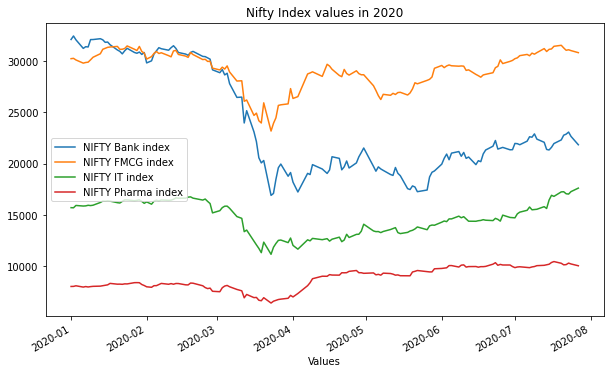

In [8]:
nifty_data.plot(title='Nifty Index values in 2020', xlabel = 'Values', figsize=(10,6))

### Gráfico de dispersão

<AxesSubplot:title={'center':'Scatter Plot for NIFTY Index values in 2020'}, xlabel='NIFTY FMCG index', ylabel='NIFTY Bank index'>

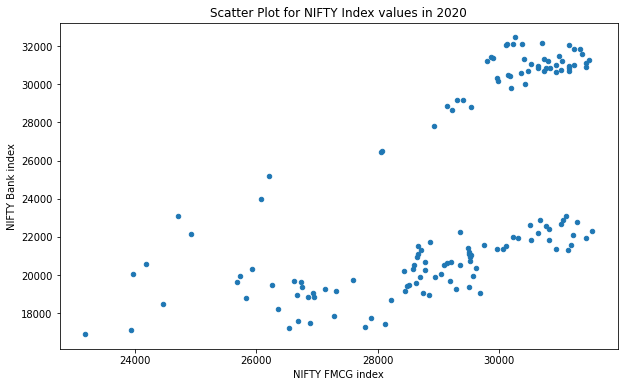

In [9]:
nifty_data.plot(kind='scatter', x='NIFTY FMCG index', y='NIFTY Bank index', title = 'Scatter Plot for NIFTY Index values in 2020', figsize=(10,6))

### Gráfico de histograma

<AxesSubplot:ylabel='Frequency'>

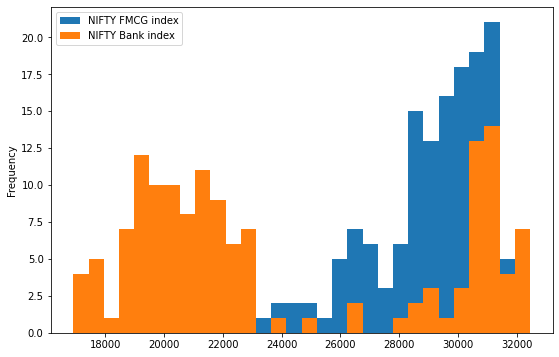

In [10]:
nifty_data[['NIFTY FMCG index','NIFTY Bank index']].plot(kind='hist',figsize=(9,6), bins=30)

### Gráfico de barras

<AxesSubplot:xlabel='Date'>

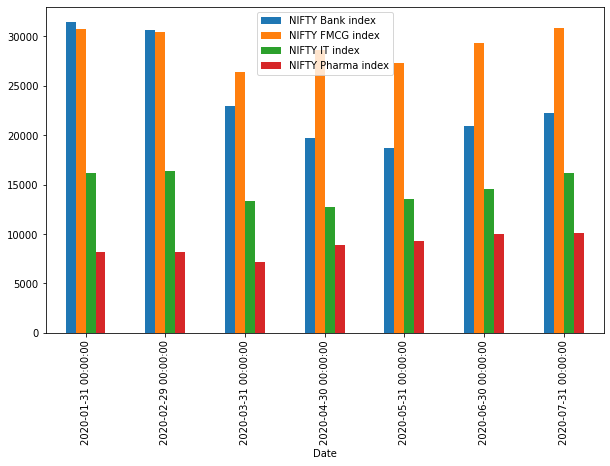

In [11]:
nifty_data_resample.plot(kind='bar',figsize=(10,6))

### Gráfico de barras empilhadas

<AxesSubplot:ylabel='Date'>

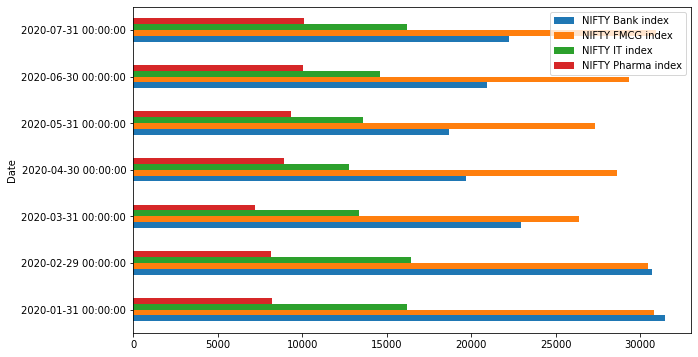

In [12]:
nifty_data_resample.plot(kind='barh',figsize=(10,6))

### Gráfico de pizza

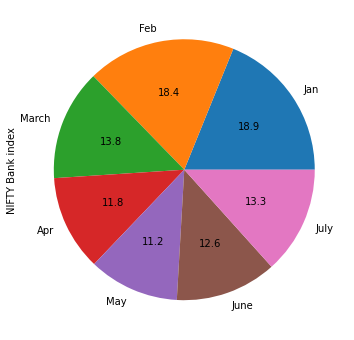

In [13]:
nifty_data_resample.index=['Jan','Feb','March','Apr','May','June','July']

nifty_data_resample['NIFTY Bank index'].plot.pie(legend=False, figsize=(10,6), autopct='%.1f');

## Bokeh Backend for Pandas — plotting with Pandas-Bokeh

A biblioteca bokeh se destaca claramente quando se trata de visualizações de dados. 

O Pandas-Bokeh fornece um backend de plotagem de bokeh para Pandas, GeoPandas e Pyspark DataFrames. Este backend adiciona um método plot_bokeh() aos DataFrames e Series.

### Instalando Pandas-Bokeh

In [14]:
#pip install pandas-bokeh

### Importação da biblioteca

In [15]:
import pandas as pd
import pandas_bokeh

É preciso definir a saída da plotagem, que pode ser qualquer um dos dois:

* **pandas_bokeh.output_notebook()**: para incorporar gráficos em Jupyter Notebooks.
* **pandas_bokeh.output_file(filename)**: para exportar gráficos como HTML.

### Geração de gráficos

In [16]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

#### Gráfico de linha

In [17]:
nifty_data.plot_bokeh(kind='line') # equivalent to nifty_data.plot_bokeh.line()

Figure(id='1004', ...)

#### Gráfico de dispersão

In [18]:
nifty_data.plot_bokeh.scatter(x='NIFTY FMCG index', y='NIFTY Bank index')

Figure(id='1345', ...)

#### Gráfico de histograma

In [19]:
nifty_data[['NIFTY FMCG index','NIFTY Bank index']].plot_bokeh(kind='hist', bins=30)

Figure(id='1489', ...)

#### Gráfico de barras

In [20]:
nifty_data_resample.plot_bokeh(kind='bar', figsize=(10,6))

Figure(id='1729', ...)

#### Gráfico de barras empilhadas

In [21]:
nifty_data_resample.plot_bokeh(kind='barh', stacked=True)

Figure(id='1977', ...)

#### Gráfico de pizza

In [22]:
nifty_data_resample.index=['Jan','Feb','March','Apr','May','June','July']

nifty_data_resample.plot_bokeh.pie(y ='NIFTY Bank index')

__x__values_original


Figure(id='2230', ...)

## Plotly Backend for Pandas — plotting with Cufflinks

Outra biblioteca comumente usada para visualização de dados é o Plotly. 

Com plotly, você pode criar gráficos interativos em Python, R e JavaScript. 

A partir da versão 4.8, o Plotly saiu com um back-end com tecnologia Plotly Express para plotagem de Pandas, o que significava que não era necessário importar plotagem para criar visualizações semelhantes a plotagem.

No entanto, a biblioteca que quero mencionar aqui não é plotly express, mas uma biblioteca wrapper independente de terceiros em torno do Plotly chamada Cufflinks. A beleza do cufflinks é que elas **são mais versáteis, possuem mais funcionalidades e possuem uma API semelhante à plotagem de pandas**. Isso significa que você só precisa **adicionar um método .iplot() aos dataframes do Pandas para plotar gráficos**.

### Repositório com vários exemplos

[https://nbviewer.org/gist/santosjorge/aba934a0d20023a136c2](https://nbviewer.org/gist/santosjorge/aba934a0d20023a136c2)

### Instalando cufflinks

In [25]:
#pip install cufflinks

Agora podemos criar visualizações com o poder de plotagem, mas com a facilidade dos pandas. **A única mudança na sintaxe é dataframe.iplot()**.

### Importação da biblioteca

In [26]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML

#making all charts public and setting a global theme
cf.set_config_file(sharing='public', theme='white', offline=True)

### Geração de gráficos

#### Gráfico de linha

In [27]:
nifty_data.iplot(kind='line')

#### Gráfico de espalhamento

Você precisa mencionar o tipo de gráfico para o tipo dispersão. 

O tipo pode ser: **lines**, **markers**, **text**, ou uma **combinação de qualquer um deles**.

In [28]:
nifty_data.iplot(kind='scatter', x='NIFTY FMCG index', y='NIFTY Bank index', mode='markers')

#### Gráfico de histograma

In [29]:
nifty_data[['NIFTY FMCG index','NIFTY Bank index']].iplot(kind='hist', bins=30)

#### Gráfico de barras

In [30]:
nifty_data_resample.iplot(kind='bar')

#### Gráfico de barras empilhadas

In [31]:
nifty_data_resample.iplot(kind='barh', barmode = 'stack')

#### Gráfico de pizza

In [32]:
nifty_data_resample.index=['Jan','Feb','March','Apr','May','June','July']

nifty_data_resample.reset_index().iplot(kind='pie', labels='index', values='NIFTY Bank index')

## Conclusão

O Bokeh ou Plotly é auto-suficiente para transmitir toda a informação. 

Com base em sua escolha e preferência, você pode escolher ambos ou qualquer um deles.

O objetivo principal é tornar as visualizações mais intuitivas e interativas ao mesmo tempo. 

Depois de ler este artigo, você deve ser capaz de converter as visualizações estáticas em suas contrapartes interativas e elevar sua análise um pouco mais.